# 7. Reverse Integer

https://leetcode.com/problems/reverse-integer/description/

In [1]:
# Method 1
def reverse(x: int) -> int:
    if x == 0:
        return 0

    negative = True if x < 0 else False # GT: Use one liner for this
    if negative:
        x = -x  # IMPORTANT

    reverse_num = []
    while x:
        n = str(x % 10)
        reverse_num.append(n)
        x //= 10

    ans = int(''.join(reverse_num))

    if negative:
        ans = -ans

    if ans < -2**31 or ans > 2**31 - 1:
        return 0
    return ans

# Time: O(n)
# Space: O(n)

# Method 2
def reverse(num: int) -> int:
    
    negative = True if x < 0 else False
    num = abs(num)
    
    reverse_num = 0
    while num:
        mod = num % 10
        reverse_num = reverse_num * 10 + mod
        num //= 10
    
    if negative:
        reverse_num = -reverse_num
    
    return reverse_num

# Time: O(n), n is number of digits
# Space: O(1)

# Method 3
def reverse(x: int) -> int:
    if x >= 0:
        res = int(str(x)[::-1])
    else:
        res=int("-"+str(abs(x))[::-1])
    return res if -2**31 <= res <= 2**31 - 1 else 0

# Time: O(log(x))

x = 120 # 123, -123, 120
print('output: ', reverse(x))

output:  21


# 9. Palindrome Number

https://leetcode.com/problems/palindrome-number/description/

In [3]:
# Method 1
def isPalindrome(x: int) -> bool:
    return str(x) == str(x)[::-1]

# Time: O(n)
# Space: O(1)

# Method 2
def isPalindrome(x: int) -> bool:
    
    if x < 0:
        return False

    reversed_num = 0
    temp = x
    while temp:
        digit = temp % 10
        reversed_num = reversed_num * 10 + digit  # IMPORTANT
        temp //= 10

    return reversed_num == x

x = 121
print(isPalindrome(x))

True


# 14. Longest Common Prefix

https://leetcode.com/problems/longest-common-prefix/description/

In [4]:
from typing import List

def longestCommonPrefix(strs: List[str]) -> str:

    ans = ""
    strs = sorted(strs) # IMPORTANT
    first = strs[0]
    last = strs[-1]
    for i in range(min(len(first), len(last))):
        if(first[i] != last[i]):
            return ans
        ans += first[i]

    return ans

# Time: O(nlogn)
# Space: O(1)

strs = ["flower", "flow", "flight"]
print(longestCommonPrefix(strs))

fl


# 29. Divide Two Integers

https://leetcode.com/problems/divide-two-integers/description/

In [6]:
def divide(dividend: int, divisor: int) -> int:

    sign = -1 if (dividend >= 0 and divisor < 0) or (dividend < 0 and divisor >= 0) else 1
    dividend = abs(dividend)
    divisor = abs(divisor)

    # result = len(range(0, dividend-divisor+1, divisor))  # COOL!
    result = 0
    while dividend >= divisor:
        dividend -= divisor
        result += 1
        
    if sign == -1:
        result = -result
    
    minus_limit = -(2**31)
    plus_limit = (2**31 - 1)
    result = min(max(result, minus_limit), plus_limit)

    return result

'''
The time complexity of the provided code is O(log(dividend/divisor)), and the space complexity is O(1).
Time Complexity:
In each iteration of the loop, the code subtracts the divisor from the dividend.
The number of iterations is determined by how many times dividend can be divided by divisor.
Since in each iteration the value of dividend is approximately halved, the time complexity is
logarithmic with respect to the ratio dividend/divisor.
Space Complexity:
The space complexity is O(1) because the code uses a constant amount of extra space regardless of the input size.
'''

dividend, divisor = 10, 3  # 10, 3 | 7, -3
print(divide(dividend, divisor))

3


In [1]:
from typing import List

def search(nums: List[int], target: int) -> int:
    
    if len(nums) <= 1:
        return -1
    
    left, right = 0, len(nums) - 1
    while left <= right: # GT: left and right can be equal
        mid = (left + right) // 2
        
        if nums[mid] == target:
            return mid
        
        if nums[left] < nums[mid]: # GT: Check if left half is sorted
            if nums[left] <= target < nums[mid]: # GT: Then check if target is there
                right = mid - 1
            else:
                left = mid + 1
        else:
            if nums[mid] < target <= nums[right]:
                left = mid + 1
            else:
                right = mid - 1
    
    return -1

# Time Complexity: The time complexity is O(log⁡n) since we're performing a binary search over the elements of the array.
# Space Complexity: The space complexity is O(1) because we only use a constant amount of space to store our variables.

nums_list = [[4,5,6,7,0,1,2], [4,5,6,7,0,1,2], [1]]
idx_list = [0, 1, 0]
for nums, idx in zip(nums_list, idx_list):
    ans = search(nums, idx)
    print('ans: ', ans)

ans:  4
ans:  5
ans:  -1


# 37. Sudoku Solver
https://leetcode.com/problems/sudoku-solver/description/

In [8]:
from typing import List

def solveSudoku(board: List[List[str]]) -> None:

    n = 9

    def isValid(row, col, num):
        for i in range(n):
            if board[i][col] == num or board[row][i] == num or board[3*(row//3)+i//3][3*(col//3)+i%3] == num: # COOL!
                return False
        return True

    def solve(row, col):
        if row == n:
            return True
        if col == n:
            return solve(row + 1, 0)

        if board[row][col] == ".":
            for num in map(str, range(1, 10)): # COOL!
                if isValid(row, col, num):
                    board[row][col] = num
                    if solve(row, col + 1):
                        return True
                    else:
                        board[row][col] = "."
            return False
        else:
            return solve(row, col + 1)

    solve(0, 0)

board = [["5","3",".",".","7",".",".",".","."], ["6",".",".","1","9","5",".",".","."], [".","9","8",".",".",".",".","6","."],
["8",".",".",".","6",".",".",".","3"], ["4",".",".","8",".","3",".",".","1"], ["7",".",".",".","2",".",".",".","6"],
[".","6",".",".",".",".","2","8","."], [".",".",".","4","1","9",".",".","5"], [".",".",".",".","8",".",".","7","9"]]
solveSudoku(board)
print(board)

[['5', '3', '4', '6', '7', '8', '9', '1', '2'], ['6', '7', '2', '1', '9', '5', '3', '4', '8'], ['1', '9', '8', '3', '4', '2', '5', '6', '7'], ['8', '5', '9', '7', '6', '1', '4', '2', '3'], ['4', '2', '6', '8', '5', '3', '7', '9', '1'], ['7', '1', '3', '9', '2', '4', '8', '5', '6'], ['9', '6', '1', '5', '3', '7', '2', '8', '4'], ['2', '8', '7', '4', '1', '9', '6', '3', '5'], ['3', '4', '5', '2', '8', '6', '1', '7', '9']]


# 39. Combination Sum
https://leetcode.com/problems/combination-sum/description/

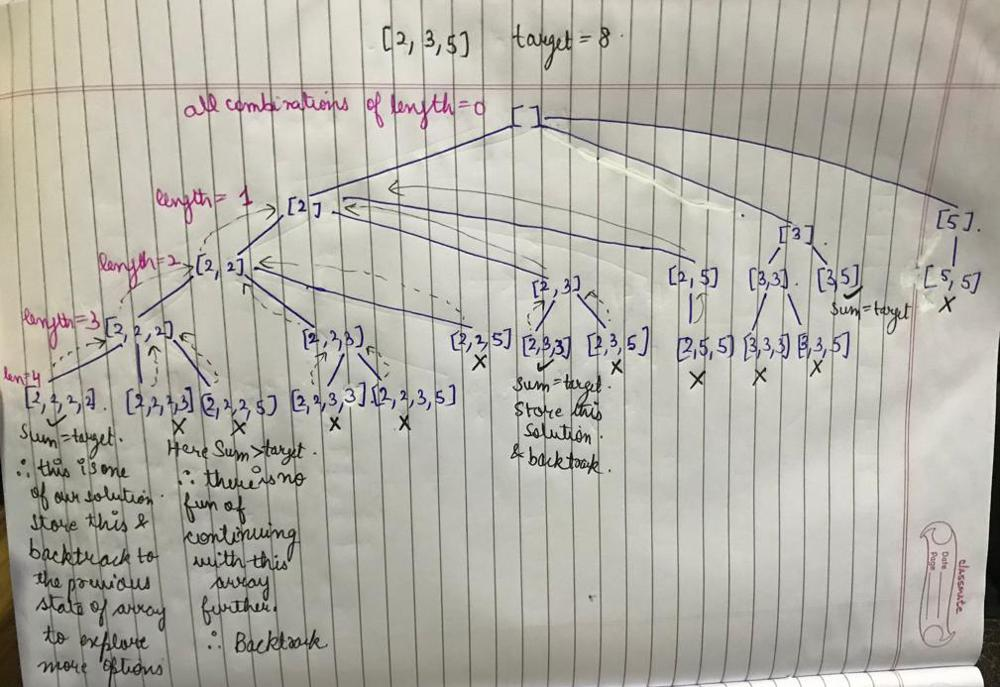

In [9]:
from typing import List

def combinationSum(candidates: List[int], target: int) -> List[List[int]]:

    ret = []
    backtrack(candidates, target, [], ret)
    return ret
    
def backtrack(nums, target, path, ret):
    if target < 0:
        return # backtracking
    if target == 0:
        ret.append(path)
        return # backtracking
    for i in range(len(nums)):
        backtrack(nums[i:], target-nums[i], path+[nums[i]], ret)

'''
Time complexity:
The time complexity of the backtracking function is O(2^n), where n is the length of the input list can.
This is because there are 2^n possible combinations of elements from the input list.
Therefore, the time complexity of the entire function is O(2^n) as well.

Space complexity:
The space complexity of the backtracking function is O(n) as the maximum number of elements that can be stored in the current combination at any point is n.
The space complexity of the entire function is also O(2^n) as there can be at most 2^n valid combinations.
'''

nums = [2,3,6,7]
target = 7
print(combinationSum(nums, target))

[[2, 2, 3], [7]]


# 40. Combination Sum II
https://leetcode.com/problems/combination-sum-ii/description/

In [10]:
from typing import List

def combinationSum2(candidates: List[int], target: int) -> List[List[int]]:
        
    candidates.sort()
    res = []
    backtrack(candidates, target, [], res, 0)
    return res

def backtrack(candidates, target, path, res, start):
    if target == 0:
        res.append(path)
        return
    for i in range(start, len(candidates)):
        if start < i and candidates[i] == candidates[i - 1]:
            continue
        if target < candidates[i]:
            break
        backtrack(candidates, target - candidates[i], path + [candidates[i]], res, i + 1)

nums = [10,1,2,7,6,1,5]
target = 8
print(combinationSum2(nums, target))

[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]


# 53. Maximum Subarray
https://leetcode.com/problems/maximum-subarray/description/

In [12]:
from typing import List

# Kadane’s algorithm
def maxSubArraySum(nums: List[int]) -> int:

    max_sum = float('-inf')
    curr_max_sum = 0

    for i in range(len(nums)):
        curr_max_sum += nums[i]
        if max_sum < curr_max_sum:
            max_sum = curr_max_sum

        if curr_max_sum < 0:
            curr_max_sum = 0

    return max_sum

# Time: O(n)
# Space: O(1)

nums = [-2,1,-3,4,-1,2,1,-5,4]
result = maxSubArraySum(nums)
print('result: ', result)

result:  6


In [3]:
from typing import List

def findMin(nums: List[int]) -> int:

    # Initialize low and high
    low, high = 0, len(nums) - 1

    # Iterate until low <= high
    while low <= high:

        # Check if the array is not rotated
        if nums[low] <= nums[high]:
            # Return nums[low] when the array is not rotated
            return nums[low]

        # Initialize mid if the array is rotated
        mid = (low + high)//2
        
        print('1 low, mid, high: ', low, mid, high)
        print('1 low, mid, high: ', nums[low], nums[mid], nums[high])

        # If the left half is sorted, the minimum element must be in the right half
        if nums[low] <= nums[mid]:
            low = mid + 1 # to prevent getting stuck when low and mid are equal, causing infinite loop
            print('New low: ', low)
        # If the right half is sorted, the minimum element must be in the left half
        else:
            high = mid # to ensure that we do not skip the potential minimum element
            print('New high: ', high)
        print('2 low, high: ', low, high)
        print('2 low, high: ', nums[low], nums[high])

'''
Time complexity: O(logN)
Space complexity: O(1)
'''

# nums_list = [[4,5,6,7,0,1,2], [4,5,6,7,0,1,2,3], [1], [55,0,1,2,3,44,45]]
nums_list = [[30, 48, 68, 71, 79, 93, 96, 96, 11, 21], [84, 84, 6, 9, 16, 17, 19, 38, 66, 67]]
for nums in nums_list:
    print(nums)
    ans = findMin(nums)
    print('ans: ', ans)
    print('')

[30, 48, 68, 71, 79, 93, 96, 96, 11, 21]
1 low, mid, high:  0 4 9
1 low, mid, high:  30 79 21
New low:  5
2 low, high:  5 9
2 low, high:  93 21
1 low, mid, high:  5 7 9
1 low, mid, high:  93 96 21
New low:  8
2 low, high:  8 9
2 low, high:  11 21
ans:  11

[84, 84, 6, 9, 16, 17, 19, 38, 66, 67]
1 low, mid, high:  0 4 9
1 low, mid, high:  84 16 67
New high:  4
2 low, high:  0 4
2 low, high:  84 16
1 low, mid, high:  0 2 4
1 low, mid, high:  84 6 16
New high:  2
2 low, high:  0 2
2 low, high:  84 6
1 low, mid, high:  0 1 2
1 low, mid, high:  84 84 6
New low:  2
2 low, high:  2 2
2 low, high:  6 6
ans:  6



# 235. Lowest Common Ancestor of a Binary Search Tree

https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-search-tree/description/

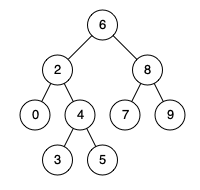

In [13]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def lowestCommonAncestor(root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':

        temp = root 
        while temp:
            if p.val < temp.val and q.val < temp.val:
                temp = temp.left
            elif temp.val < p.val and temp.val < q.val:
                temp = temp.right
            else:
                return temp

'''
Time complexity: O(h)
h is the height of the tree.
In the worst case, when the tree is skewed (completely unbalanced), the time complexity is O(n),
where n is the number of nodes in the tree.
Space complexity: O(1)
        The algorithm uses only a constant amount of extra space.
'''


'\nTime complexity: O(h)\nh is the height of the tree.\nIn the worst case, when the tree is skewed (completely unbalanced), the time complexity is O(n),\nwhere n is the number of nodes in the tree.\nSpace complexity: O(1)\n        The algorithm uses only a constant amount of extra space.\n'

In [7]:
from typing import List

def findKthPositive(nums: List[int], k: int) -> int:

    nums = set(nums)
    missing_nums = []
    i = 1
    while True:
        if len(missing_nums) == k:
            return missing_nums[k-1]
        if i not in nums:
            missing_nums.append(i)
        i +=1

'''
Time complexity: O(n + k), as the last two for loops will run for O(n) and O(k) times respectively.
Space complexity: O(1).

Intuition
- Number of missing numbers can be calculated by comparing arr[i] and i.
- If arr[i] = 5 and i = 3, arr = [1,2,3,5], we can say that arr[i] - (i + 1) = 1 numbers are missing.
- After finding the index where arr[i] - i > k, add k to i (i + k) to find the missing number.
- For the abovementioned example if k = 1, arr[i] - i > k at i = 3.
- 5 - 3 > 1. Answer is i + k = 3 + 1 = 4, thus 4 is missing

Approach
We use a binary search approach for this problem since we want time complexity to be better than O(n).
Binary search over nums and try to find the first index where arr[mid] - mid > k.

https://youtu.be/uZ0N_hZpyps?si=2fVgMitL1EQs-OxR
'''

def findKthPositive(nums: List[int], k: int) -> int:
    
    lo, hi = 0, len(nums) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        missing = nums[mid] - (mid + 1)
        if missing < k:
            lo = mid + 1
        else:
            hi = mid - 1
    return lo + k

'''
Time complexity: O(logn)
Space complexity: O(1)
'''

nums_lists = [[2,3,4,7,11], [1,2,3,4]]
ks = [5, 2]
for nums, k in zip(nums_lists, ks):
    ans = findKthPositive(nums, k)
    print('ans: ', ans)

ans:  9
ans:  6


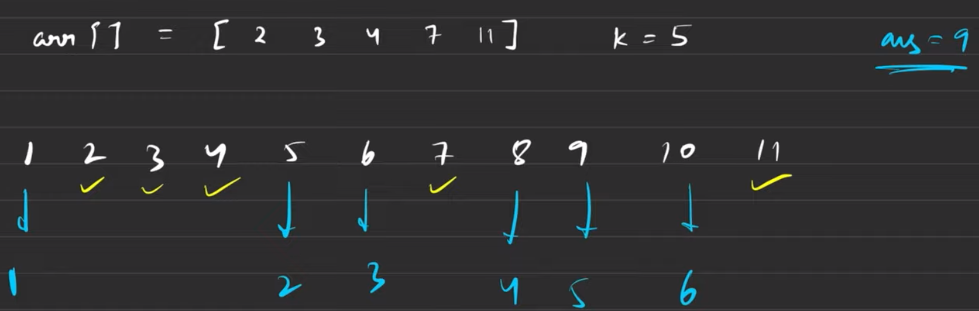
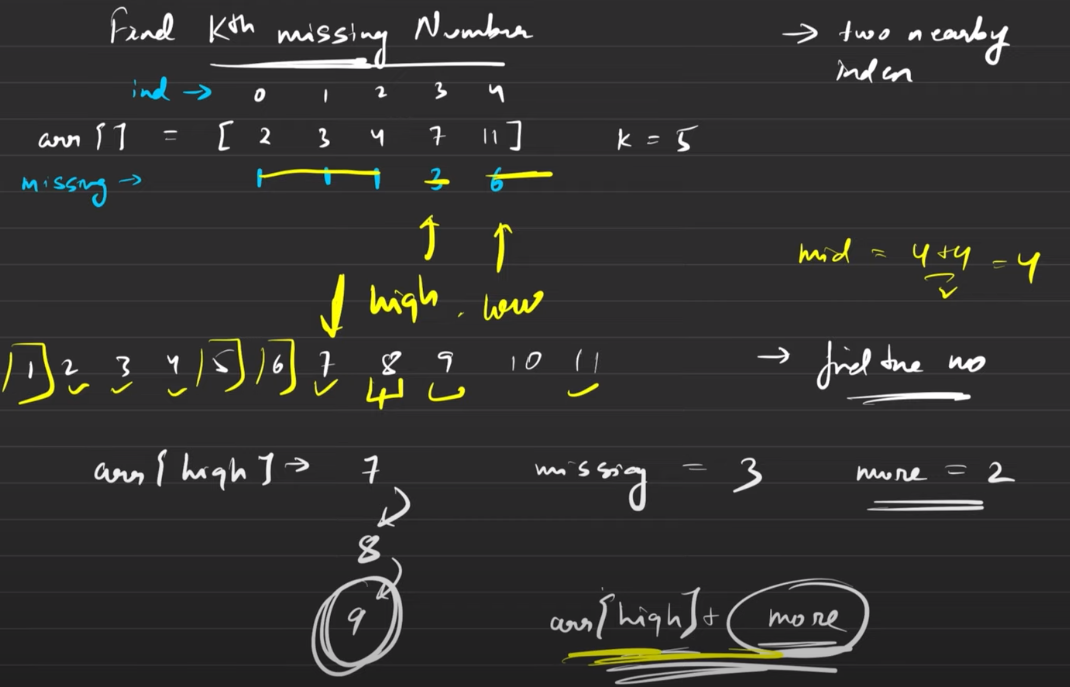
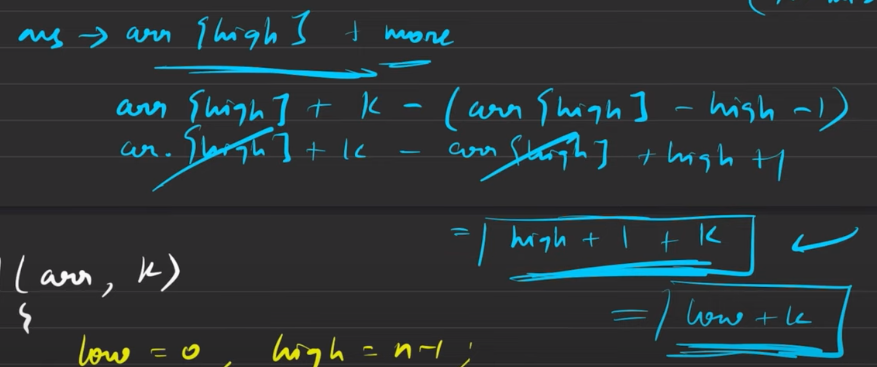